# Thickness Curves for Determination of Thickness of the Adsorbed Layer
Thickness equations describe the statistical thickness of an adsorbing layer of gas as a function of the relative pressure of this gas.  The actual thickness of the adsorbed layer may take a variety of values for different points on the surface of a sample.  When working with simple models of adsorption, it makes sense to work with just the statistical average thickness over the entire surface of the sample.  More sophisticated models may take into account deviations from the average thickness, but such models will not be discussed here.

The original motivation for formulating a thickness equation was to account for the adsorbed layer of gas on pore walls when determining a pore size distribution from a material's isotherm.  Specifically the thickness function is used to determine when a pore of a particular radius has been completely filled with adsorptive. The thickness functions are also used in the t-plot method in which an isotherm in question is shown with the thickness on the horizontal axis rather than the relative pressure.  The t-plot method is discussed further in the tplot notebook.

The most noteworthy of the thickness equations used in the literature are those of Harkins and Jura, Halsey, and Broekhoff-de Boer.  These thickness equations and some others are described below.

For the below calculations, we use an implementation of the below thickness equations from the [report-models-python](https://github.com/Micromeritics/report-models-python) on github from Micromeritics.

### Harkins and Jura

The work of Harkins and Jura has shown that a plot of $\log_{10}{(P_\mathrm{rel})} = a - b/V_\mathrm{a}^\mathrm{2}$ returns  a linear region where the film is condensed. It is reasonable to assume the average thickness of the adsorbed layer is proportional to the quantity of gas adsorbed, $t \propto V_a$, so one may relate the thickness to the relative pressure as follows

$\displaystyle{t = \left(\frac{C_\mathrm{1}}{C_\mathrm{2}-\log_{10}{(P_\mathrm{rel})}}\right)^{1/2}}
\hspace{4em}C_\mathrm{1} = 13.99
\hspace{2em}C_\mathrm{2} = 0.034$

where $C_1$ and $C_2$ are empirically determined.

Harkins, W.D. and Jura, G., J. Am. Chem. Soc., 66, 1366 (1944).

### Kruk-Jaroniec-Sayari
The model of Kruk Jaroniec and Sayari bears some resemblence to that of Harkins and Jura, but the exponent is different

$\displaystyle{t = \left(\frac{C_\mathrm{1}}{C_\mathrm{2}-\log_{10}{(P_\mathrm{rel})}}\right)^{C_\mathrm{3}}} 
\hspace{4em} C_\mathrm{1} = 60.6500
\hspace{2em} C_\mathrm{2} = 0.03071
\hspace{2em} C_\mathrm{3} = 0.3968$

M. Kruk, M. Jaroniec, and A. Sayari. ["Application of Large Pore MCM-41 Molecular Sieves To Improve Pore Size Analysis Using Nitrogen Adsorption Measurements."](http://pubs.acs.org/doi/abs/10.1021/la970776m) Langmuir, 1997, 13 (23), pp 6267–6273

M. Kruk, M. Jaroniec, and A. Sayari. ["Adsorption Study of Surface and Structural Properties of MCM-41 Materials of Different Pore Sizes."](http://pubs.acs.org/doi/abs/10.1021/jp962000k) J. Phys. Chem. B, 1997, 101 (4), pp 583–589

Michal Kruk, Mietek Jaroniec, and Abdelhamid Sayari. ["Relations between Pore Structure Parameters and Their Implications for Characterization of MCM-41 Using Gas Adsorption and X-ray Diffraction."](http://pubs.acs.org/doi/abs/10.1021/cm981006e) Chem. Mater., 1999, 11 (2), pp 492–500

### Halsey

The Halsey equation assumes the adsorbed liquid monolayer has the same density and packing as the normal liquid. 

$\displaystyle{t = C_\mathrm{1}\left(\frac{C_\mathrm{2}}{\ln{(P_\mathrm{rel})}}\right)^{1/3}}
\hspace{4em}C_\mathrm{1} = 3.540
\hspace{2em}C_\mathrm{2} = -5.0001$

where $\textrm{ln}(P_{\mathrm{rel}})$ is the natural logarithm of the relative pressure and where the $C$ constants above are empirical.

Halsey, G.D., J. Chem. Phys., 16, 931 (1948).

### Broekhoff-de Boer

$\displaystyle{\log_{10}{(P_\mathrm{rel})} = \frac{C_\mathrm{1}}{t^2}+C_\mathrm{2}e^{C_\mathrm{3}t}}
\hspace{4em}C_\mathrm{1} = -16.1100
\hspace{2em}C_\mathrm{2} = 0.1682
\hspace{2em}C_\mathrm{3} = -0.1137$

where the $C$ constants are empirical.

Broekhoff, J.C.P. and de Boer, J.H., "The Surface Area in Intermediate Pores," Proceedings of the International Symposium on Surface Area Determination, D.H. Everett, R.H. Ottwill, eds., U.K. (1969).

### Carbon Black STSA

$\displaystyle{t = C_\mathrm{1}} + C_\mathrm{2}P_\mathrm{rel}+ C_\mathrm{3}P_\mathrm{rel}^2
\hspace{4em}C_\mathrm{1} = 2.9800
\hspace{2em}C_\mathrm{2} = 6.4500
\hspace{2em}C_\mathrm{3} = 0.8800$

Magee, R.W., Presented paper, Rubber Div., *J. Am Chem. Soc Meeting*, Pittsburgh, Pa., Oct. 11-14 (1994)


## Comparison of Thickness Curves
All the curves are shown on the same graph for reference below.  When looking at any of these thickness curves, remind yourself that the widths of the gas molecules being adsorbed are an Angstrom or slightly larger.  To interpret these curves for thickness values on the scale of an Angstrom, it is implied that the whole surface is only partially covered with adsorbing molecules.

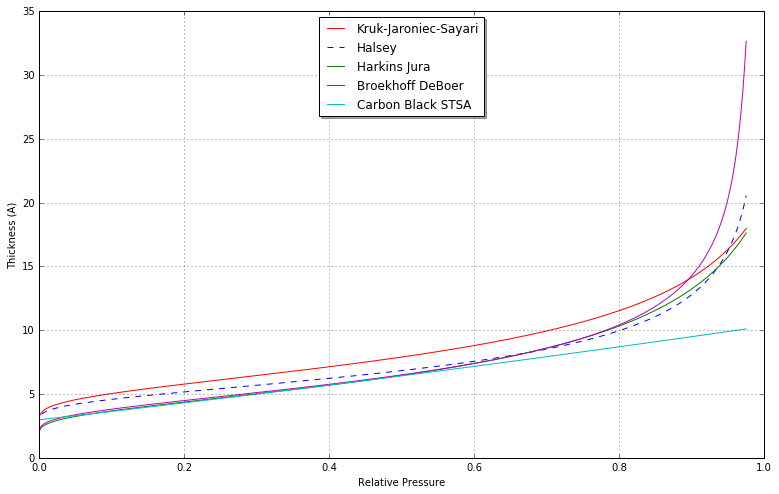

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from micromeritics import thickness, plots

x = np.arange(-6.0, -0.01, 0.001)
Prel = np.power(10,x)
fig = plt.figure(figsize=(13,8))
axes = fig.add_subplot(111)
axes.plot(Prel, thickness.KrukJaroniecSayari()(Prel), 'r-', label='Kruk-Jaroniec-Sayari')
axes.plot(Prel, thickness.Halsey()(Prel),'b--', label='Halsey')
axes.plot(Prel, thickness.HarkinsJura()(Prel), 'g-', label = 'Harkins Jura')
axes.plot(Prel, thickness.BroekhoffDeBoer()(Prel),'m-', label= 'Broekhoff DeBoer')
axes.plot(Prel, thickness.CarbonBlackSTSA()(Prel) ,'c-', label='Carbon Black STSA')
axes.set_xlabel('Relative Pressure')
axes.set_ylabel('Thickness (A)')
legend = axes.legend(loc='upper center', shadow=True)
axes.grid()
plt.show()